<a href="https://colab.research.google.com/github/arshiakm/car-data/blob/main/car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving cardata.csv to cardata (4).csv


In [ ]:
df = pd.read_csv('cardata.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB
None


In [ ]:
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   299.000000     299.000000     299.000000     299.000000  299.000000
mean   2013.615385       4.589632       7.541037   36916.752508    0.043478
std       2.896868       4.984240       8.567887   39015.170352    0.248720
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.850000       1.200000   15000.000000    0.000000
50%    2014.000000       3.510000       6.100000   32000.000000    0.000000
75%    2016.000000       6.000000       9.840000   48883.500000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
print(df["Fuel_Type"].value_counts())
print(df["Seller_Type"].value_counts())
print(df["Transmission"].value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


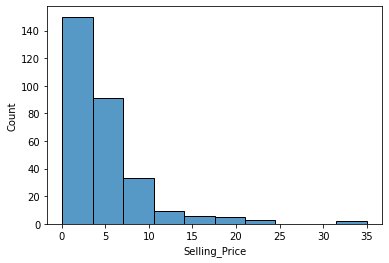

In [ ]:
sns.histplot(data=df, x="Selling_Price", bins=10)
plt.show()

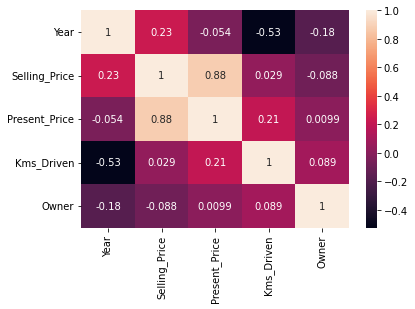

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

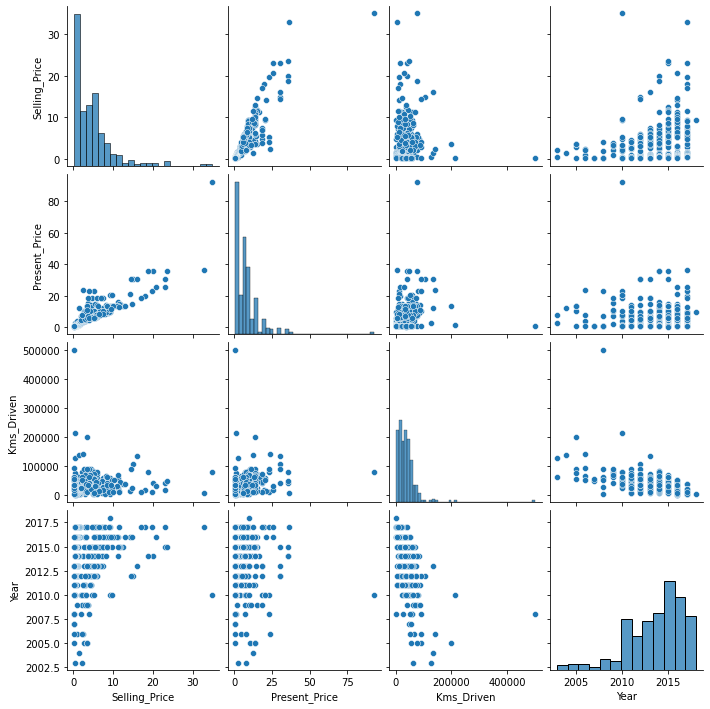

In [ ]:
sns.pairplot(df[["Selling_Price", "Present_Price", "Kms_Driven", "Year"]])
plt.show()

In [ ]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)

dt_reg_pred = dt_reg.predict(X_test)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)

rf_reg_pred = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)

In [ ]:
print("Linear Regression Mean Squared Error = %f" % lin_reg_mse)
print("Decision Tree Regression Mean Squared Error = %f" % dt_reg_mse)
print("Random Forest Regression Mean Squared Error = %f" % rf_reg_mse)

Linear Regression Mean Squared Error = 17.033639
Decision Tree Regression Mean Squared Error = 4.071243
Random Forest Regression Mean Squared Error = 11.327066


Text(0.5, 1.0, 'Linear Regression')

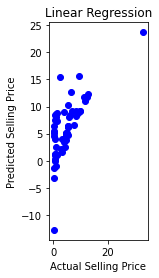

In [ ]:
plt.subplot(131)
plt.scatter(y_test, lin_reg_pred, color="blue")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Decision Tree Regression')

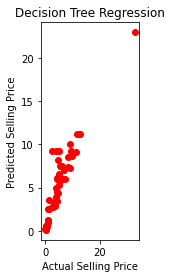

In [ ]:
plt.subplot(132)
plt.scatter(y_test, dt_reg_pred, color="red")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Decision Tree Regression")

Text(0.5, 1.0, 'Random Forest Regression')

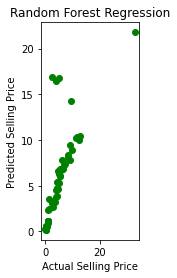

In [ ]:
plt.subplot(133)
plt.scatter(y_test, rf_reg_pred, color="green")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest Regression")